# Using GroupBy with CDC data

In [ ]:
import requests
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get the data from CDC and look at it in json format

response = requests.get("https://data.cdc.gov/resource/saz5-9hgg.json")
jsonhold = response.json()
jsonhold

In [ ]:
# Put the data into a DataFrame

vaccines = pd.DataFrame(jsonhold)
vaccines

In [ ]:
# Create month and week columns

vaccines['month'] = pd.to_datetime(vaccines['week_of_allocations']).dt.month
vaccines['week'] =  pd.to_datetime(vaccines['week_of_allocations']).dt.week
vaccines

In [ ]:
# This is just to show that the qty is not numeric
# Groupby will find all numeric columns (unless otherwise specified) and aggregate them

vaccines.groupby('jurisdiction').sum()

In [ ]:
vaccines.info()

In [ ]:
# Changing the datatypes & column names

vaccines['month'] = vaccines.month.astype(str)
vaccines['week'] = vaccines.week.astype(str)
vaccines['_1st_dose_allocations'] = pd.to_numeric(vaccines['_1st_dose_allocations']).astype(int)
vaccines['_2nd_dose_allocations'] = pd.to_numeric(vaccines['_2nd_dose_allocations']).astype(int)
vaccines['_2nd_dose_allocations'] = vaccines._2nd_dose_allocations*1.2


short_names = {'_1st_dose_allocations':'first',
               '_2nd_dose_allocations':'second'}
vaccines.rename(columns=short_names, inplace=True)
               
vaccines.info()

In [ ]:
vaccines.jurisdiction.unique()

In [ ]:
vaccines = vaccines[vaccines.jurisdiction.isin(['Massachusetts','New Hampshire', 'Rhode Island'])]
vaccines.shape

In [ ]:
vaccines.head()

## Using matplotlib

In [ ]:
# We cannot.  Matplotlib does not work with dataframes.

plt.bar(vaccines.month,vaccines.second)


## Using seaborn

In [48]:
vaccines.groupby('month').mean()

,first,second
month,,
3,44752.5,53703.0
4,45727.5,54873.0
5,47616.0,57139.2
6,47760.0,57312.0


<AxesSubplot:xlabel='month', ylabel='first'>

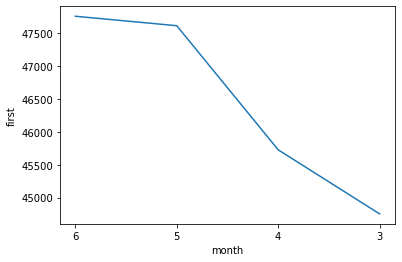

In [45]:
sns.lineplot(data=vaccines, x='month', y='first', ci = None)
# Seaborn has aggregated the data but uses mean as the aggregation

In [49]:
vaccines.groupby('month').sum()

,first,second
month,,
3,537030,644436.0
4,548730,658476.0
5,714240,857088.0
6,429840,515808.0


<AxesSubplot:xlabel='month', ylabel='first'>

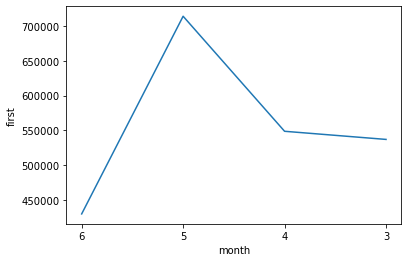

In [62]:
sns.lineplot(data=vaccines, x='month', y='first', ci = None, estimator = 'sum')
#plt.xticks(vaccines.month)
#plt.show()

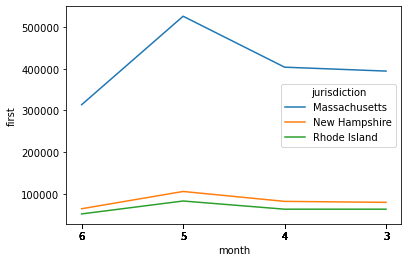

In [51]:
# Add a line for each jurisdiction
sns.lineplot(data=vaccines, x='month', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction')
plt.xticks(vaccines.month)
plt.show()

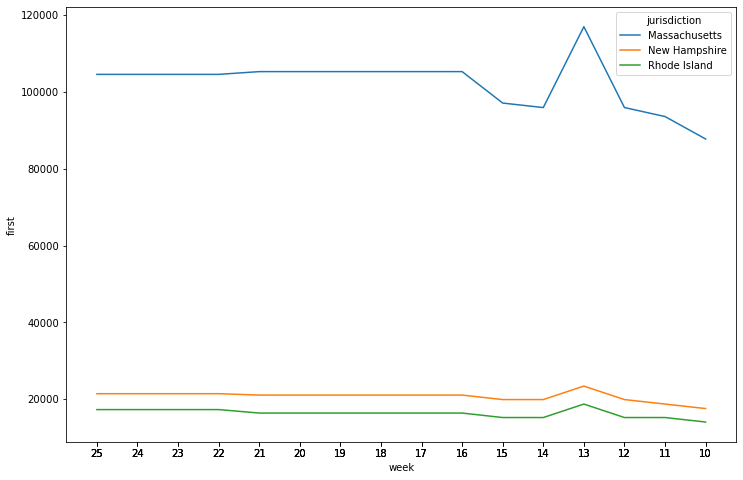

In [52]:
# Change month to week
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction')
plt.xticks(vaccines.week)
plt.show()

AttributeError: 'Line2D' object has no property 'col'

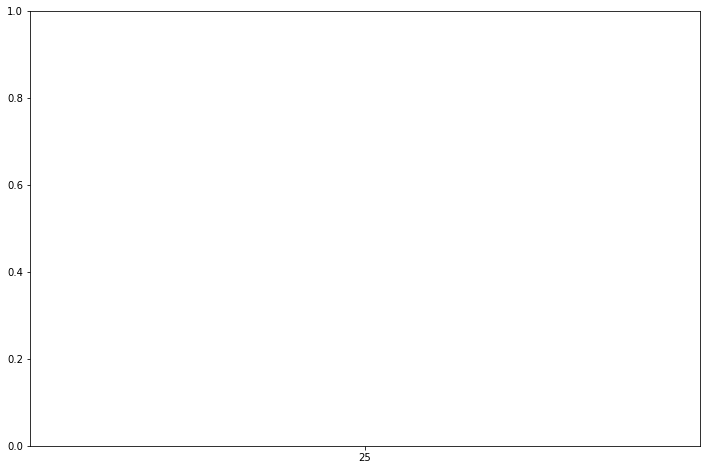

In [53]:
# Add a facetgrid
# Cannot do that with lineplot
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction',col='month')
plt.xticks(vaccines.week)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.relplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', 
            hue = 'jurisdiction',col='month', kind = 'line',
           col_wrap = 2)
plt.xticks(vaccines.week)
plt.show()

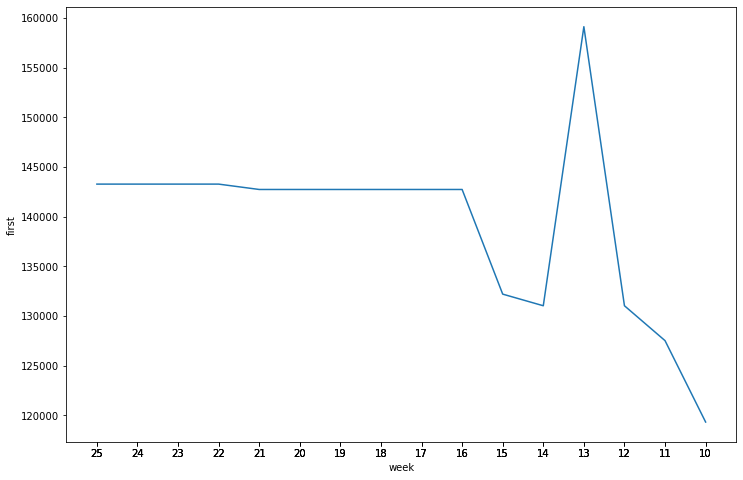

In [54]:
# Change month to week
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum')
plt.xticks(vaccines.week)
plt.show()

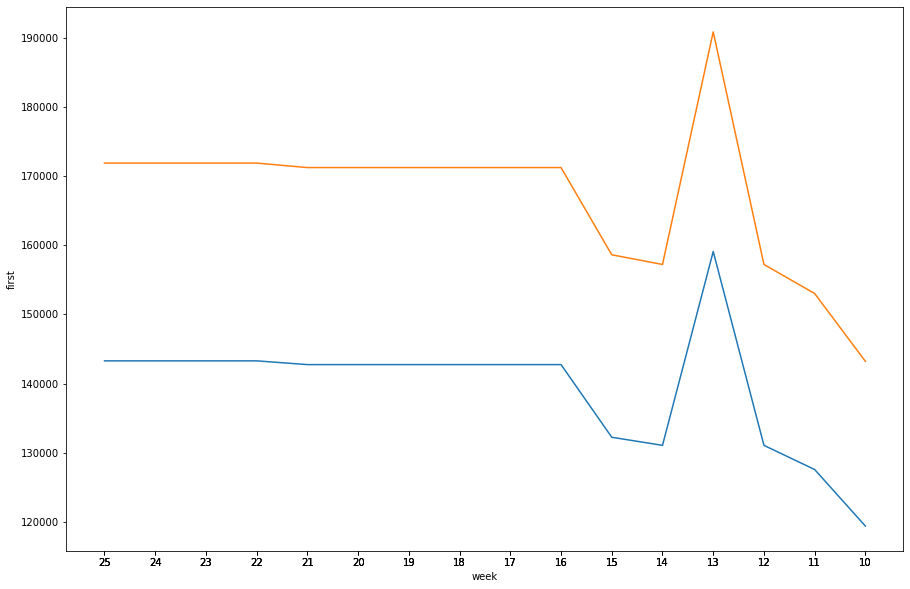

In [55]:
fig, ax1 = plt.subplots(figsize=(15, 10))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum')
sns.lineplot(data=vaccines, x='week', y='second', ci = None, estimator = 'sum')
plt.xticks(vaccines.week)
plt.show()

In [56]:
vaccines.columns

Index(['jurisdiction', 'week_of_allocations', 'first', 'second', 'month',
       'week'],
      dtype='object')

In [57]:
v_long = vaccines.melt(id_vars=['jurisdiction', 'week_of_allocations','month','week'], 
                          var_name = 'allocation', value_name='dist').sort_values(by = 'jurisdiction')
v_long.head(20)

,jurisdiction,week_of_allocations,month,week,allocation,dist
0,Massachusetts,2021-06-21T00:00:00.000,6,25,first,104580.0
42,Massachusetts,2021-03-15T00:00:00.000,3,11,first,93600.0
24,Massachusetts,2021-04-26T00:00:00.000,4,17,first,105300.0
54,Massachusetts,2021-06-07T00:00:00.000,6,23,second,125496.0
27,Massachusetts,2021-04-19T00:00:00.000,4,16,first,105300.0
51,Massachusetts,2021-06-14T00:00:00.000,6,24,second,125496.0
84,Massachusetts,2021-03-29T00:00:00.000,3,13,second,140400.0
30,Massachusetts,2021-04-12T00:00:00.000,4,15,first,97110.0
78,Massachusetts,2021-04-12T00:00:00.000,4,15,second,116532.0
33,Massachusetts,2021-04-05T00:00:00.000,4,14,first,95940.0


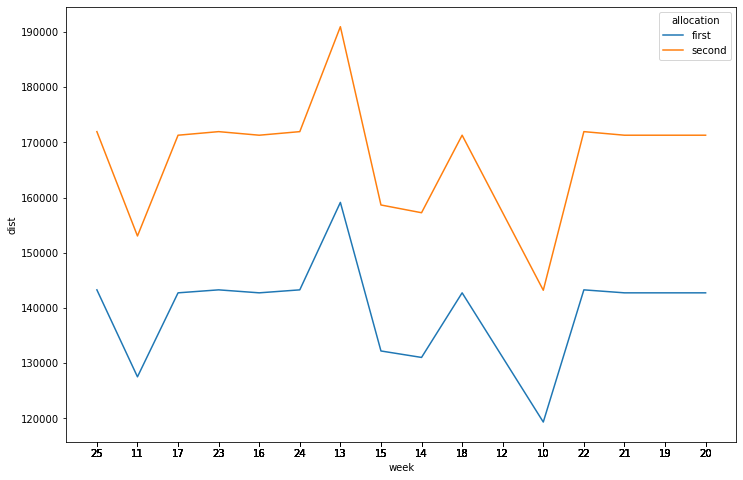

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(data=v_long, x='week', y='dist', ci = None, estimator = 'sum', hue = 'allocation')
plt.xticks(v_long.week)
plt.show()